In [1]:
import pandas as pd
import re
import json
import networkx as nx

In [12]:
df = pd.read_csv('section_data.csv')
df.head()

,course_id,section_id,total_seats_count,open_seats_count,section_days,class_start_time,class_end_time,class_building,class_room
0,AASP100,0101,35,0,MWF,10:00am,10:50am,TYD2106,2106
1,AASP100,0201,35,0,MWF,12:00pm,12:50pm,SKN1115,1115
2,AASP100,0301,30,0,MWF,12:00pm,12:50pm,SQH1103,1103
3,AASP100,0401,30,0,TuTh,12:30pm,1:45pm,HBK0115,0115
4,AASP100,0501,33,0,TuTh,11:00am,12:15pm,ASY3215,3215


In [13]:
df['building'] = df['class_building'].apply(lambda x: re.sub(r'[^a-zA-Z]', '', x))


In [14]:
df.head()

,course_id,section_id,total_seats_count,open_seats_count,section_days,class_start_time,class_end_time,class_building,class_room,building
0,AASP100,0101,35,0,MWF,10:00am,10:50am,TYD2106,2106,TYD
1,AASP100,0201,35,0,MWF,12:00pm,12:50pm,SKN1115,1115,SKN
2,AASP100,0301,30,0,MWF,12:00pm,12:50pm,SQH1103,1103,SQH
3,AASP100,0401,30,0,TuTh,12:30pm,1:45pm,HBK0115,0115,HBK
4,AASP100,0501,33,0,TuTh,11:00am,12:15pm,ASY3215,3215,ASY


In [15]:
df['total_students'] = df['total_seats_count'] - df['open_seats_count']

In [23]:
unique_values = df['building'].unique()
print(unique_values.size)

83


In [8]:
df['section_days'].unique()

array(['MWF', 'TuTh', 'Tu', 'W', 'MW', 'M', 'F', 'Th', 'Sa', 'WF', 'MF',
       'MTu', 'MTuWThF', 'MTuWF', 'MTuThF'], dtype=object)

In [4]:
json_file_path = 'Graph\graph.json'

# Load the JSON data from file
with open(json_file_path, 'r') as f:
    data = json.load(f)

# Create a directed graph
graph = nx.DiGraph()

# Add nodes and edges to the graph based on the JSON data
for key, value in data.items():
    source, target = key.split("-")
    graph.add_edge(source, target, weight=int(value))

# Save the graph as a GEXF file
nx.write_gexf(graph, "graph.gexf")

In [17]:
day_mapping = {
    'M': 'Monday',
    'Tu': 'Tuesday',
    'W': 'Wednesday',
    'Th': 'Thursday',
    'F': 'Friday',
    'Sa': 'Saturday',
}

# Create a function to convert the string into a list of days
def parse_days(days):
    for key in sorted(day_mapping.keys(), key=len, reverse=True):
        days = days.replace(key, day_mapping[key] + ',')
    return days.strip(',').split(',')

# Step 2: Convert 'section_days' into a list of days
df['section_days'] = df['section_days'].apply(parse_days)

# Step 3: Explode the list into multiple rows
df = df.explode('section_days')

In [18]:
df.head()

,course_id,section_id,total_seats_count,open_seats_count,section_days,class_start_time,class_end_time,class_building,class_room,building,total_students
0,AASP100,0101,35,0,Monday,10:00am,10:50am,TYD2106,2106,TYD,35
0,AASP100,0101,35,0,Wednesday,10:00am,10:50am,TYD2106,2106,TYD,35
0,AASP100,0101,35,0,Friday,10:00am,10:50am,TYD2106,2106,TYD,35
1,AASP100,0201,35,0,Monday,12:00pm,12:50pm,SKN1115,1115,SKN,35
1,AASP100,0201,35,0,Wednesday,12:00pm,12:50pm,SKN1115,1115,SKN,35


In [19]:
df = df.drop('section_id', axis=1)
df = df.drop('total_seats_count', axis=1)
df = df.drop('open_seats_count', axis=1)
df = df.drop('class_building', axis=1)
df = df.drop('class_room', axis=1)

In [20]:
df.head()

,course_id,section_days,class_start_time,class_end_time,building,total_students
0,AASP100,Monday,10:00am,10:50am,TYD,35
0,AASP100,Wednesday,10:00am,10:50am,TYD,35
0,AASP100,Friday,10:00am,10:50am,TYD,35
1,AASP100,Monday,12:00pm,12:50pm,SKN,35
1,AASP100,Wednesday,12:00pm,12:50pm,SKN,35


In [25]:
# Group by 'class_building'
grouped = df.groupby('building')

dfs = {}
for name, group in grouped:
    dfs[name] = group

In [27]:
dfs["AJC"]

,course_id,section_days,class_start_time,class_end_time,building,total_students
461,BIOE221,Monday,4:00pm,4:50pm,AJC,30
462,BIOE221,Monday,4:00pm,4:50pm,AJC,30
478,BIOE411,Tuesday,12:30pm,1:45pm,AJC,30
478,BIOE411,Thursday,12:30pm,1:45pm,AJC,30
479,BIOE414,Tuesday,2:00pm,3:15pm,AJC,13
...,...,...,...,...,...,...
3664,NUH278Y,Tuesday,3:30pm,4:45pm,AJC,7
3664,NUH278Y,Thursday,3:30pm,4:45pm,AJC,7
3827,INST711,Thursday,6:00pm,8:45pm,AJC,21
4412,ATH729P,Monday,11:00am,12:15pm,AJC,37


In [43]:
# Let's create a new dictionary to hold the results
dfs_grouped = {}

# Loop through each dataframe in the dictionary
for building, df in dfs.items():
    # Extract the hour from 'class_start_time' and 'class_end_time'
    df['start_hour'] = pd.to_datetime(df['class_start_time']).dt.hour
    df['end_hour'] = pd.to_datetime(df['class_end_time']).dt.hour

    # Create a list to store dataframes for each hour
    df_list = []

    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        # For each hour in the range of start_hour and end_hour (exclusive), 
        # create a new row with the same data and append it to df_list
        for hour in range(row['start_hour'], row['end_hour']):
            new_row = row.copy()
            new_row['hour'] = hour
            df_list.append(new_row)

    # Create a new DataFrame from df_list
    df_hours = pd.DataFrame(df_list)

    # Group by 'hour' and calculate the sum of 'total_student'
    dfs_grouped[building] = df_hours.groupby('hour')['total_students'].sum().reset_index()

# Now dfs_grouped is your new dictionary of dataframes, 
# where each key is a building name and its value is a DataFrame with total_students for each hour


In [50]:
dfs_grouped["VMH"]

,hour,total_students
0,9,2870
1,10,548
2,11,3562
3,12,4333
4,13,26
5,14,4085
6,15,2989
7,16,385
8,17,876
9,18,225


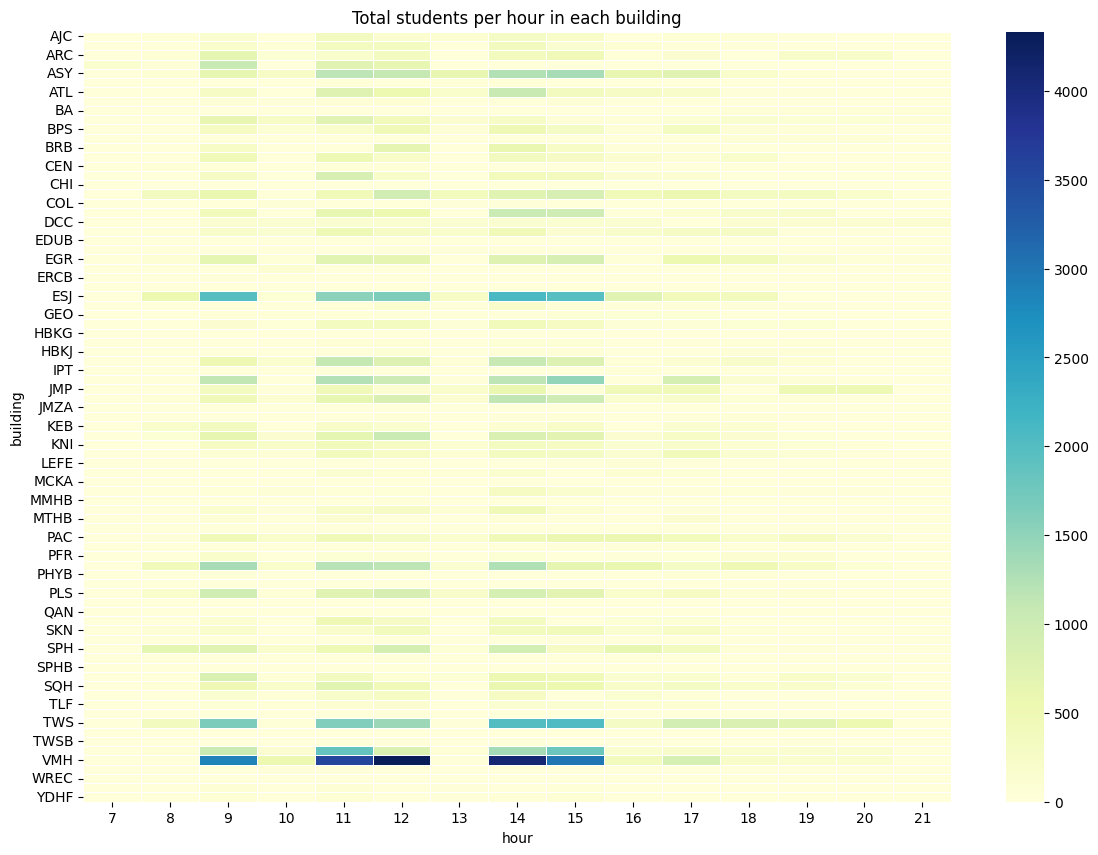

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate all dataframes in dfs_grouped into one, adding building names as a new column
df_all = pd.concat([df.assign(building=building) for building, df in dfs_grouped.items()])

# Create a pivot table for the heatmap
pivot_table = df_all.pivot_table(values='total_students', index='building', columns='hour', fill_value=0)

# Draw a heatmap with the pivot table
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=.5)
plt.title('Total Students Per Hour In Each Building')
plt.show()

In [83]:
from sklearn.cluster import KMeans
import numpy as np

# Concatenate all dataframes in dfs_grouped into one, adding building names as a new column
df_all = pd.concat([df.assign(building=building) for building, df in dfs_grouped.items()])

# Create a pivot table to transform the data into the right format
pivot_table = df_all.pivot_table(values='total_students', index='building', columns='hour', fill_value=0)

# Decide on the number of clusters
n_clusters = 5

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pivot_table)

# The cluster labels for each building are now stored in kmeans.labels_
labels = kmeans.labels_

# You can add these labels back to the pivot_table DataFrame if desired
pivot_table['cluster'] = labels


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
pivot_table

hour,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,cluster
building,,,,,,,,,,,,,,,,
AJC,0,50,151,0,372,130,104,302,232,0,71,60,21,0,0,0
ANS,0,0,197,43,330,340,0,358,137,75,24,24,0,0,0,0
ARC,0,78,670,88,174,342,0,377,467,37,127,9,234,224,0,0
ARM,156,52,1038,0,720,628,0,0,0,0,0,0,0,0,0,0
ASY,0,76,642,255,1161,1100,612,1243,1321,623,712,203,47,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VMH,0,0,2870,548,3562,4333,26,4085,2989,385,876,225,168,165,16,2
VMHH,0,0,0,18,23,0,2,14,0,0,0,0,0,0,0,3
WREC,0,6,6,6,6,6,6,0,0,0,0,0,0,0,0,3


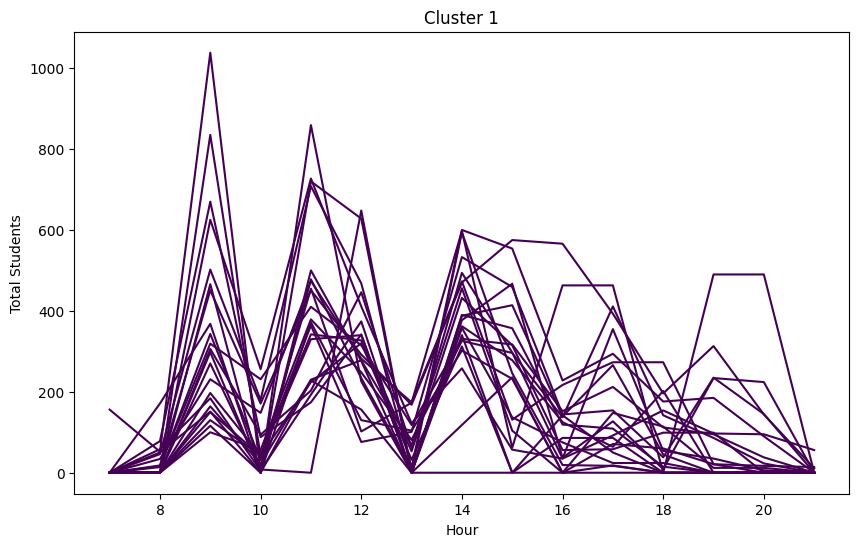

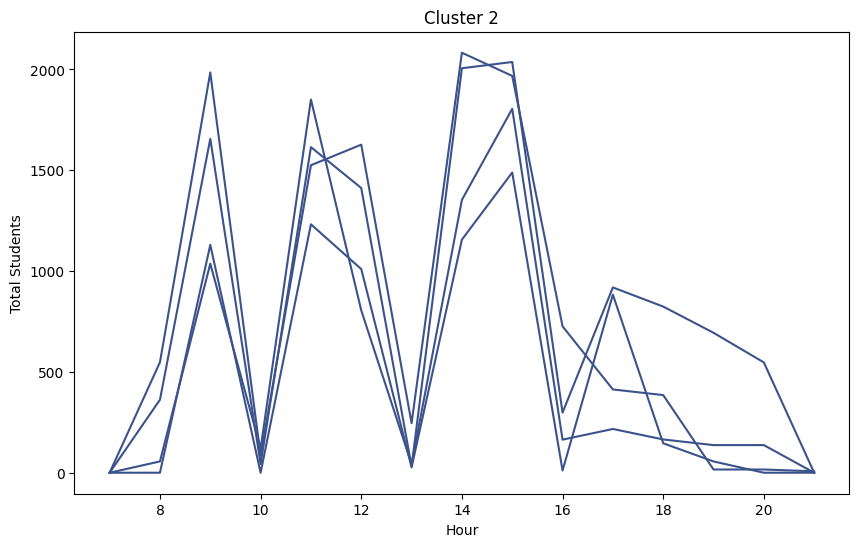

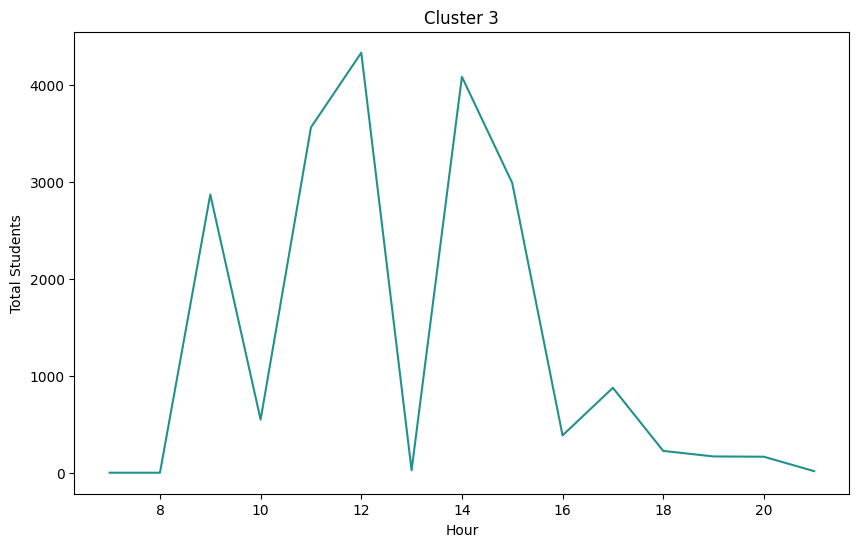

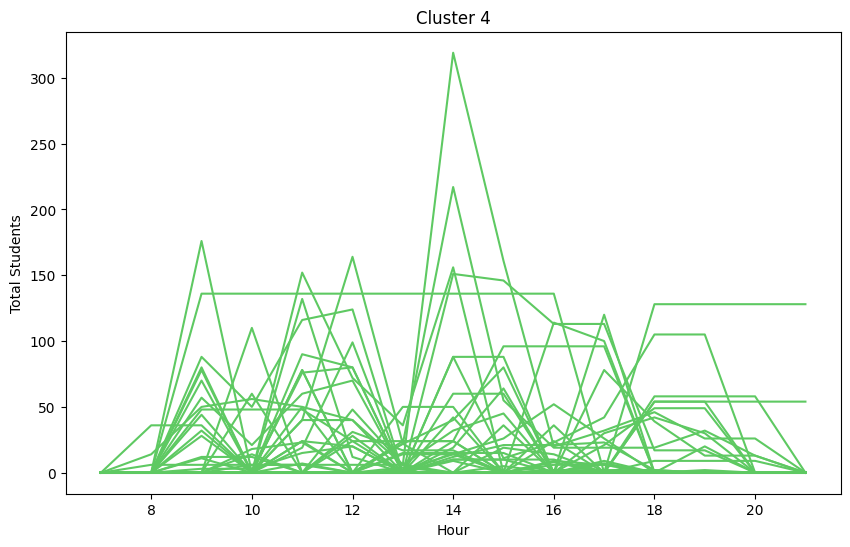

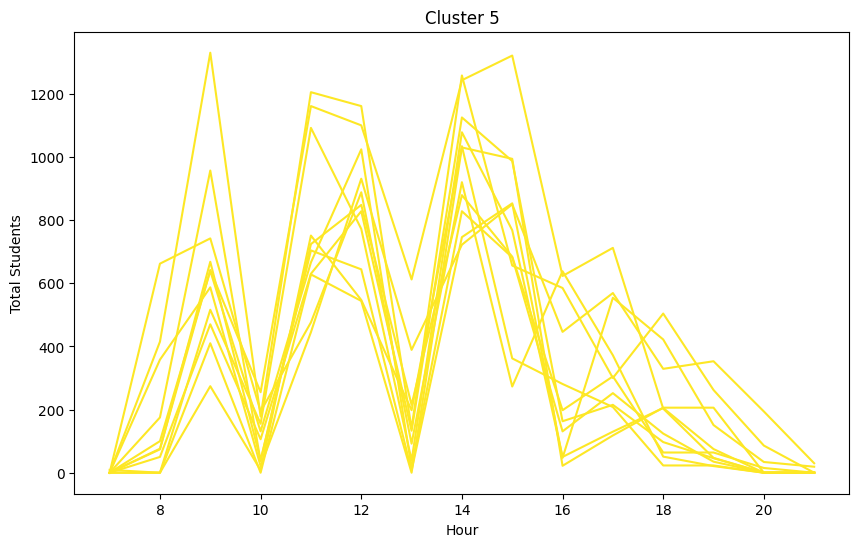

In [90]:
import matplotlib.pyplot as plt

# Set the number of clusters
n_clusters = 5

# Create a color map for the clusters
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, n_clusters)]

# Plot the student count per hour for each building, colored by cluster
for cluster in range(n_clusters):
    plt.figure(figsize=(10, 6))
    for building in pivot_table[pivot_table['cluster'] == cluster].index:
        plt.plot(pivot_table.loc[building].drop('cluster'), color=colors[cluster])
    
    plt.title(f'Cluster {cluster+1}')
    plt.xlabel('Hour')  # x-axis label
    plt.ylabel('Total Students')  # y-axis label
    plt.show()


In [88]:
pivot_table[pivot_table['cluster'] == 1]

hour,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,cluster
building,,,,,,,,,,,,,,,,
ESJ,0,548,1985,85,1525,1627,246,2083,1968,726,413,385,16,16,7,1
IRB,0,0,1130,0,1232,1010,27,1156,1489,11,883,146,56,0,0,1
TWS,0,362,1656,43,1615,1412,31,2006,2037,298,919,824,694,547,0,1
TYD,0,56,1037,120,1851,805,42,1353,1805,164,217,165,137,137,0,1
